## Statistical Analysis and Feature Engineering for Credit Default Prediction
 
 This notebook is dedicated to in-depth statistical analysis and the creation of enhanced features from the cleaned credit default dataset. The key steps covered include:
 
 - **Descriptive Statistics:** Understanding the central tendency, dispersion, and distribution of numerical features.
 - **Hypothesis Testing:** Statistically evaluating relationships between selected features and the target variable (`default`).
 - **Skewness & Outlier Analysis:** Investigating feature distributions to identify asymmetries and potential outliers.
 - **Feature Engineering:** Creating new, more informative features from existing raw data to enhance predictive power.
 
 The output of this notebook will be a dataset enriched with new features, ready for machine learning model training in the next phase.

## Load Cleaned Dataset

 We begin by loading the pre-cleaned dataset, which is the output from the previous data cleaning phase.


In [88]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import os

# Create directory for plots if it doesn't exist
os.makedirs("../assets/plots", exist_ok=True)


In [89]:
# Load the cleaned dataset
df = pd.read_csv("../data/inputs/cleaned/cleaned_credit_data.csv")
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,bill_amount_jun,bill_amount_may,bill_amount_apr,payment_amount_sep,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Descriptive Statistics
 
 We calculate summary statistics for the numerical variables to understand their central tendency, dispersion, and distribution. This provides a foundational understanding of the dataset's characteristics.


In [90]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_delay_sep,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_delay_aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_delay_jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_delay_jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_delay_may,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
pay_delay_apr,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
bill_amount_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_amount_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


### Interpretation of Descriptive Statistics
 
 The summary statistics provide valuable initial insights into the dataset:
 
 * **`limit_bal` (Credit Limit):**
     * Mean: Approximately 167,484. The maximum limit is 1,000,000, indicating a wide range of credit limits among clients.
     * Standard Deviation: High (129,747), suggesting significant variability in credit limits.
 *   **`age`:**
     * Mean: Around 35.48 years. The range is from 21 to 79 years.
     * The 25th, 50th (median), and 75th percentiles (28, 34, 41) indicate that the majority of clients are young to middle-aged adults.
 * **`pay_delay_sep` to `pay_delay_apr` (Payment Delay Status):**
     * These columns represent the repayment status, where -1 indicates payment on time, 1-9 indicate delays in months, and 0 indicates no consumption or revolving credit.
     * The mean values are relatively low, suggesting that on average, clients are not severely delinquent. However, the minimums and maximums (e.g., max delay of 8 months) highlight the presence of severe delays.
 * **`bill_amount` and `payment_amount` (Monthly Bill/Payment Amounts):**
     * These features show very large standard deviations and a wide range, indicating high variability.
     * The median values (50th percentile) are often much lower than the mean, suggesting right-skewness (many smaller values and a few very large ones), which is common for financial transaction data. This will be further explored in the skewness analysis.

 These insights give us a strong baseline understanding before performing more detailed analysis and feature engineering.


##  Hypothesis Testing

 We perform statistical hypothesis tests to examine potential relationships between selected features and the `default` target variable. This helps in understanding which features have a statistically significant association with credit default.



### Chi-Square Test: Gender vs Default Status

 **Purpose**: To determine if there is a statistically significant association between `gender` and `default` payment status.
 
 **Test Type**: Chi-square test of independence.
 
 **Hypotheses**:
 * **Null Hypothesis (H₀)**: Gender and default payment status are independent (i.e., there is no association between them).
 * **Alternative Hypothesis (H₁)**: Gender and default payment status are not independent (i.e., there is a statistically significant association).


In [91]:
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation) of 'sex' and 'default'
contingency_table = pd.crosstab(df['sex'], df['default'])
print("Contingency Table (Gender vs Default):\n", contingency_table)

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Contingency Table (Gender vs Default):
 default      0     1
sex                 
female   14349  3763
male      9015  2873

Chi-squared statistic: 47.71
P-value: 0.0000


### Chi-Square Test: Gender vs Default Status - Conclusion
 
 **Results**:
 * Chi-squared statistic: **47.71**
 * P-value: **0.0000** (very close to zero)
 
 **Conclusion**:
    Since the p-value ($\approx 0.0000$) is **less than our typical significance level of 0.05**, we **reject the null hypothesis (H₀)**.
 
 This suggests that there is a **statistically significant association** between gender and the likelihood of defaulting on credit. In other words, the default rates are not independent of gender in this dataset. This feature (`sex`) is likely to be informative for our predictive models.


### Mann-Whitney U Test: Age vs Default Status
 
 **Purpose**: To compare the distribution of `age` between clients who defaulted and those who did not. This test is used because `age` might not be normally distributed, and the Mann-Whitney U test is a non-parametric alternative to the t-test for independent samples.
 
 **Test Type**: Mann-Whitney U test.
 
 **Hypotheses**:
 * **Null Hypothesis (H₀)**: The age distribution is the same for clients who defaulted and clients who did not default.
 * **Alternative Hypothesis (H₁)**: The age distribution is different for the two groups.


In [92]:
from scipy.stats import mannwhitneyu

# Split 'age' into two groups based on 'default' status
age_default_0 = df[df["default"] == 0]["age"] # Age of non-defaulters
age_default_1 = df[df["default"] == 1]["age"] # Age of defaulters

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(age_default_0, age_default_1)

print(f"Mann-Whitney U statistic: {stat:.2f}")
print(f"P-value: {p:.4f}")

Mann-Whitney U statistic: 76966879.50
P-value: 0.3725


### Mann-Whitney U Test: Age vs Default Status - Conclusion
 
 **Results**:
 * Mann-Whitney U statistic: **76,966,879.50**
 * P-value: **0.3725**
 
 **Conclusion**:
 Since the p-value ($\approx 0.3725$) is **greater than our typical significance level of 0.05**, we **fail to reject the null hypothesis (H₀)**.
 
 This indicates that there is **no statistically significant difference** in the age distribution between clients who defaulted and those who did not default. While `age` is an important demographic feature, this test suggests its individual direct relationship with `default` might be weak, and its predictive power might be limited on its own.


### Interpretation Summary of Hypothesis Tests
 
 * **Gender**: The Chi-Square test revealed a **statistically significant association** between `gender` and `default` status. This implies that gender might be a relevant predictor in our models.
 * **Age**: The Mann-Whitney U test showed **no statistically significant difference** in `age` distribution between defaulting and non-defaulting clients. This suggests that `age` on its own might not be a strong predictor of default.
 
 These findings help us understand the potential predictive power of individual features and guide our feature selection and engineering strategies.


##  Skewness & Outliers Analysis
 
 Skewness measures the asymmetry of a probability distribution. Highly skewed features can contain outliers and might negatively impact the performance of some machine learning models. We first calculate skewness for all numerical features and then visualize the distributions of some selected features to identify potential outliers.


In [93]:
# Calculate skewness for all numerical features in the DataFrame
skewness_values = df.skew(numeric_only=True).sort_values(ascending=False)
print("Skewness for Numerical Features:\n", skewness_values)


Skewness for Numerical Features:
 payment_amount_aug    30.453817
payment_amount_jul    17.216635
payment_amount_sep    14.668364
payment_amount_jun    12.904985
payment_amount_may    11.127417
payment_amount_apr    10.640727
bill_amount_jul        3.087830
bill_amount_may        2.876380
bill_amount_apr        2.846645
bill_amount_jun        2.821965
bill_amount_aug        2.705221
bill_amount_sep        2.663861
default                1.343504
pay_delay_may          1.008197
pay_delay_jun          0.999629
limit_bal              0.992867
pay_delay_apr          0.948029
pay_delay_jul          0.840682
pay_delay_aug          0.790565
age                    0.732246
pay_delay_sep          0.731975
dtype: float64


### Skewness Analysis Summary
 
 We evaluated the skewness for several numerical features. Skewness indicates the degree of asymmetry of a distribution around its mean. A positive skew indicates a long tail to the right, often implying the presence of high values (outliers).
 
#### ⚠️ Highly Skewed Features (Skewness > 10):
 These features show extreme right-skewness, indicating a large concentration of values at the lower end and a few very high values (potential outliers).
 
 * `payment_amount_aug`: 30.45
 * `payment_amount_jul`: 17.22
 * `payment_amount_sep`: 14.67
 * `payment_amount_jun`: 12.90
 * `payment_amount_may`: 11.13
 * `payment_amount_apr`: 10.64
 
 #### ⚠️ Moderately Skewed Features (Skewness ~ 2.6–3.1):
 These features are also right-skewed but to a lesser degree than the payment amounts.
 
 * `bill_amount_jul`: 3.09
 * `bill_amount_may`: 2.88
 * `bill_amount_apr`: 2.85
 * `bill_amount_jun`: 2.82
 * `bill_amount_aug`: 2.71
 * `bill_amount_sep`: 2.66
 
#### ✅ Mild or Acceptable Skewness (< 2):
 These features are relatively less skewed and are closer to a normal distribution, making them less problematic for models sensitive to skewness.
 
 * `default` (target): 1.34
 * `pay_delay_may`: 1.01
 * `pay_delay_jun`: 1.00
 * `limit_bal`: 0.99
 * `pay_delay_apr`: 0.95
 * `pay_delay_jul`: 0.84
 * `pay_delay_aug`: 0.79
 * `age`: 0.73
 * `pay_delay_sep`: 0.73
 
 High skewness, especially in payment and bill amounts, suggests the presence of outliers and may require transformation (e.g., log transformation) for certain models or robust scaling techniques.


 To further understand the distributions and visually identify outliers, we plot histograms for a few selected features. We chose `limit_bal`, `age`, `bill_amount_sep`, and `payment_amount_sep` as representative examples.


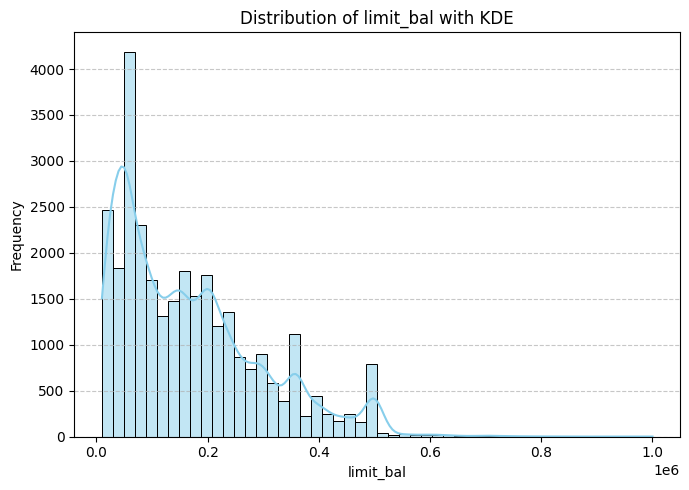

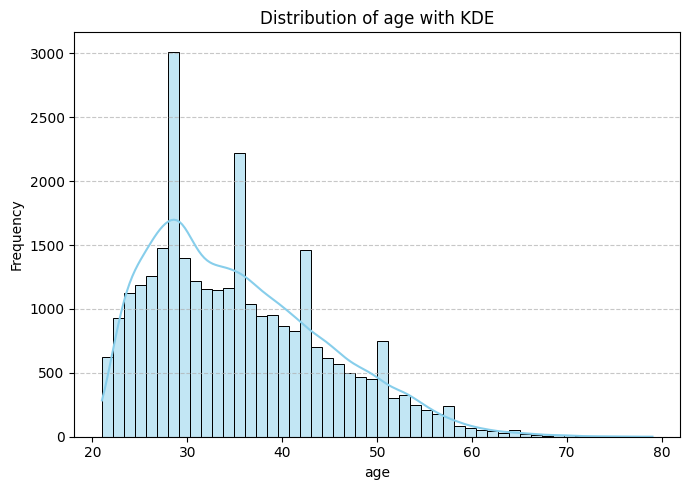

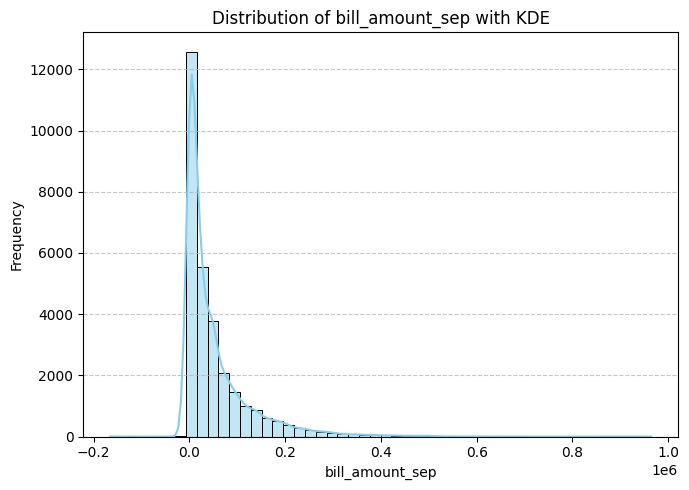

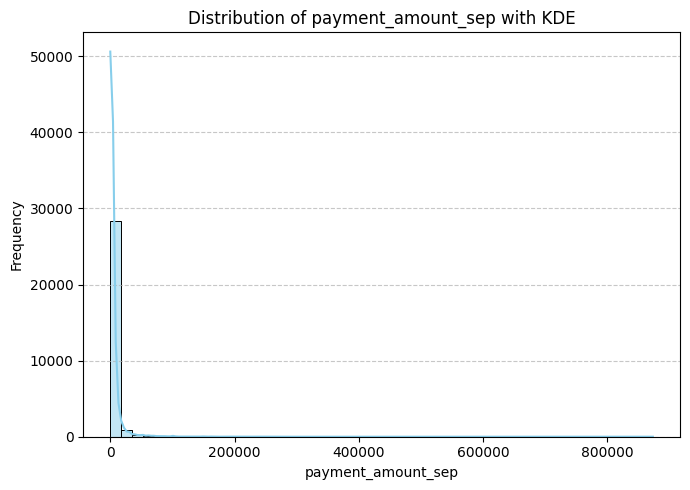

In [94]:
# Features selected for visual skewness and outlier analysis
skewed_features_to_plot = ["limit_bal", "age", "bill_amount_sep", "payment_amount_sep"]

for feature in skewed_features_to_plot:
    plt.figure(figsize=(7, 5))
    sns.histplot(df[feature], kde=True, bins=50, color='skyblue')
    plt.title(f"Distribution of {feature} with KDE")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.tight_layout() 
    plt.savefig(f"../assets/plots/{feature}_distribution.png") 
    plt.show()

### Key Observations from Distribution Plots:
 
 * **`limit_bal` (Credit Limit):** Shows a right-skewed distribution, with a high frequency of lower credit limits and a long tail extending to higher limits.
 * **`age`:** Appears more symmetrical than the financial amounts, but still slightly right-skewed, confirming the numerical skewness calculation.
 * **`bill_amount_sep` (September Bill Amount):** Clearly right-skewed, with a large number of clients having low bill amounts and a few having very high bills. This indicates potential outliers.
 * **`payment_amount_sep` (September Payment Amount):** Extremely right-skewed, showing that most customers make small payments, while a very small number make extremely large payments. This feature is heavily influenced by outliers.
 
 These visualizations confirm the numerical skewness analysis and highlight the presence of outliers, particularly in the `payment_amount` and `bill_amount` features. Addressing these outliers (e.g., through robust scaling, Winsorization, or log transformations) might be beneficial for certain models in future steps. We used September values (`_sep`) as a representative month for billing and payment behavior for this diagnostic step.


##  Feature Engineering
 
 In this crucial step, we create new features from existing raw data. These engineered features are designed to capture more complex patterns and relationships, potentially improving the predictive power of our models regarding credit default risk.
 
 We focus on deriving insights from billing, payment, repayment behavior, and credit usage:
 
 * **`total_bill_amount`**: The sum of all bill amounts over the six months. This captures the overall financial obligation.
 * **`total_payment_amount`**: The sum of all payment amounts over the six months. This indicates the total repayment effort.
 * **`payment_to_bill_ratio`**: The ratio of total payments to total bill amounts. This is a critical indicator of repayment efficiency and financial health.
 * **`payment_delay_count`**: The number of months a customer had a payment delay (payment status > 0). This quantifies delinquency frequency.
 * **`high_utilization`**: A binary flag (1 or 0) indicating if a customer utilized more than 80% of their credit limit in any of the six billing months. High utilization often correlates with higher default risk.
 * **`avg_payment_delay`**: The average repayment delay over the six months. This provides a smoothed measure of repayment behavior.
 * **`has_ever_paid_on_time`**: A binary flag (1 or 0) indicating if the customer ever paid on time (payment status = -1) in any of the six months. This might distinguish highly diligent payers.


In [95]:
# Feature 1: Total bill amount over 6 months
# Summing up bill amounts from September to April
df["total_bill_amount"] = df[["bill_amount_sep", "bill_amount_aug", "bill_amount_jul",
                              "bill_amount_jun", "bill_amount_may", "bill_amount_apr"]].sum(axis=1)

# Feature 2: Total payment amount over 6 months
# Summing up payment amounts from September to April
df["total_payment_amount"] = df[["payment_amount_sep", "payment_amount_aug", "payment_amount_jul",
                                  "payment_amount_jun", "payment_amount_may", "payment_amount_apr"]].sum(axis=1)

# Feature 3: Ratio of total payment to total bill
df["payment_to_bill_ratio"] = df["total_payment_amount"] / df["total_bill_amount"]
# Handle potential division by zero (inf) or NaN values, replacing them with 0
df["payment_to_bill_ratio"] = df["payment_to_bill_ratio"].fillna(0).replace([np.inf, -np.inf], 0)

# Feature 4: Count of months with payment delays
# Identify columns related to payment delays
pays_cols = ["pay_delay_sep", "pay_delay_aug", "pay_delay_jul",
             "pay_delay_jun", "pay_delay_may", "pay_delay_apr"]
# Count how many months have a payment delay (status > 0)
df["payment_delay_count"] = df[pays_cols].apply(lambda row: (row > 0).sum(), axis=1)

# Feature 5: High credit utilization flag (used > 80% of limit in any month)
# Identify columns related to bill amounts
bill_cols = ["bill_amount_sep", "bill_amount_aug", "bill_amount_jul",
             "bill_amount_jun", "bill_amount_may", "bill_amount_apr"]
# Check if any monthly bill amount exceeds 80% of the credit limit, convert boolean to int (0 or 1)
df["high_utilization"] = df[bill_cols].gt(df["limit_bal"] * 0.8, axis=0).any(axis=1).astype(int)

# Feature 6: Average payment delay
# Calculate the mean of payment delay statuses across the six months
df["avg_payment_delay"] = df[pays_cols].mean(axis=1)

# Feature 7: Has ever paid on time
# Check if the customer ever had a payment status of -1 (paid on time) in any month
df["has_ever_paid_on_time"] = df[pays_cols].eq(-1).any(axis=1).astype(int)

print("New engineered features created successfully.")


New engineered features created successfully.


In [96]:
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,payment_amount_may,payment_amount_apr,default,total_bill_amount,total_payment_amount,payment_to_bill_ratio,payment_delay_count,high_utilization,avg_payment_delay,has_ever_paid_on_time
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,1,7704.0,689.0,0.089434,2,0,-0.333333,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,0.0,2000.0,1,17077.0,5000.0,0.292791,2,0,0.500000,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,1000.0,5000.0,0,101653.0,11018.0,0.108388,0,0,0.000000,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,1069.0,1000.0,0,231334.0,8388.0,0.036259,0,1,0.000000,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,689.0,679.0,0,109339.0,59049.0,0.540054,0,0,-0.333333,1


# Project Phase Summary: Statistics & Feature Engineering
 
 ## Overview
 
 This phase was crucial for transforming raw data into a format suitable for machine learning, focusing on understanding the underlying patterns and creating new, more insightful features.
 
 ### Key Activities Performed:
 
 1.  **Descriptive Statistics**:
     * We generated summary statistics (mean, median, standard deviation, min, max, quartiles) for all numerical features.
     * This provided an initial understanding of data distributions, central tendencies, and variability for variables like `limit_bal`, `age`, and monthly bill/payment amounts.
 
 2.  **Skewness & Outlier Analysis**:
     * We quantified the skewness of numerical features, identifying highly skewed distributions (e.g., `payment_amount` and `bill_amount` series).
     * Visualizations (histograms with KDE) confirmed the presence of significant right-skewness and potential outliers, particularly in financial transaction amounts. This suggests that robust scaling or data transformation might be beneficial for future modeling.
 
 3.  **Hypothesis Testing**:
     * **Chi-Square Test (Gender vs Default)**: We found a **statistically significant association** between `gender` and `default` status (p-value < 0.05). This indicates gender is likely an informative feature.
     * **Mann-Whitney U Test (Age vs Default)**: We found **no statistically significant difference** in `age` distribution between defaulting and non-defaulting clients (p-value > 0.05). This suggests `age` alone might have limited predictive power.
     * These tests provided data-driven insights to guide feature selection and understanding of relationships.
 
 4.  **Feature Engineering**:
     We created seven new, highly informative features designed to capture deeper credit behavior patterns:
     * `total_bill_amount`: Aggregate billing over six months.
     * `total_payment_amount`: Aggregate payments over six months.
     * `payment_to_bill_ratio`: Efficiency of repayment.
     * `payment_delay_count`: Frequency of payment delays.
     * `high_utilization`: Flag for high credit usage.
     * `avg_payment_delay`: Average delay behavior.
     * `has_ever_paid_on_time`: Indicator of punctual payment history.
 
 ## Outcome & Next Steps:
 
 The dataset is now not only statistically understood but also significantly enriched with domain-specific features. These newly engineered features are expected to provide richer signals for machine learning models, leading to potentially improved prediction accuracy for credit default.
 
 The next steps will involve using this prepared dataset for advanced model training and evaluation, leveraging these enhanced features.


In [97]:
# Save the DataFrame with new engineered features back to a CSV file
# This file will be used in subsequent modeling notebooks
df.to_csv("../data/inputs/cleaned/cleaned_credit_data.csv", index=False)
print("Updated cleaned_credit_data.csv saved with engineered features.")

Updated cleaned_credit_data.csv saved with engineered features.
